1-1. 載入所需的套件 pandas, matplotlib, numpy, 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'HanWangHeiHeavy' # 設定字型檔讓 matplotlib 使用
import collections
import seaborn as sns
%matplotlib inline

1-2. 載入資料學測資料檔 exam_xc.csv 存為變數 examxc

In [2]:
exam = pd.read_csv('exam_xc.csv')
exam.head(2)

,QID,代號,來源,類別,年份,題型,題號,題目簡述,答案,章節,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
0,28617.0,sdcxc-ma091-1-01ax,學測數學091,學測數學,91,單選,1,到兩點距離和,(A),msseq 二次曲線,...,82.0,0.0,0.0,8.0,10.0,25.0,3.0,4.0,19.0,50.0
1,28632.0,sdcxc-ma091-1-02ax,學測數學091,學測數學,91,單選,2,樹的直徑,(B),msckx 數學綜合概念,...,1.0,2.0,84.0,12.0,1.0,3.0,15.0,17.0,37.0,28.0


1-3. 刪除 QID 欄，且將代號設為 index

In [3]:
del exam["QID"]

In [4]:
exam = exam.set_index(["代號"])
exam.head(2)

,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,P,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
代號,,,,,,,,,,,,,,,,,,,,,
sdcxc-ma091-1-01ax,學測數學091,學測數學,91,單選,1,到兩點距離和,(A),msseq 二次曲線,二次曲線,76,...,82.0,0.0,0.0,8.0,10.0,25.0,3.0,4.0,19.0,50.0
sdcxc-ma091-1-02ax,學測數學091,學測數學,91,單選,2,樹的直徑,(B),msckx 數學綜合概念,數學綜合概,51,...,1.0,2.0,84.0,12.0,1.0,3.0,15.0,17.0,37.0,28.0


2.1 分別計算 單選, 多選, 填充的數量

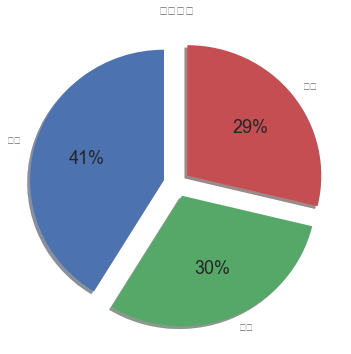

In [5]:
quesType = exam["題型"]
quesTypeCounts = quesType.value_counts()
plt.figure(figsize=(6,6))
font = {'size':18}
matplotlib.rc('font',**font)
plt.pie(quesTypeCounts,labels = quesTypeCounts.index, 
        autopct="%2.0f%%",shadow=True,startangle=90,
        explode=(0.1,0.1,0.1))
plt.title(u"學測試題")

In [6]:
exambyYearType = exam.groupby(["來源","題型"]).count().iloc[:,0:1]
exambyYearType.columns.values[0]="題數"
exambyYearType.head(3)

題數
來源      題型    
學測數學091 單選   6
        填充   8
        多選   6

In [7]:
exambyYearType.unstack().T

來源     學測數學091  學測數學092  學測數學093  學測數學094  學測數學095  學測數學096  學測數學097  學測數學098  \
   題型                                                                           
題數 單選        6        5        6        5        5        5        5        6   
   填充        8        9        9        9        9        9        8        9   
   多選        6        6        5        6        6        6        7        5   

來源     學測數學099  學測數學100  學測數學101  學測數學102  學測數學103  學測數學104  學測數學105  學測數學106  
   題型                                                                          
題數 單選        7        6        7        6        6        4        6        7  
   填充        8        7        7        8        8       10        7        7  
   多選        5        7        6        6        6        6        7        6

In [8]:
ansRatebyType = exam.groupby("題型").mean().round(2)
ansRatebyType.iloc[:,1:12]

,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,T,D
題型,,,,,,,,,,,
單選,50.53,75.51,50.80,25.28,81.70,63.76,50.82,37.54,18.70,NaN,50.23
填充,33.94,64.50,29.23,8.08,74.29,46.15,28.98,15.34,4.68,NaN,56.42
多選,40.80,64.81,38.41,19.19,71.82,51.72,38.29,26.82,15.28,25.28,45.62


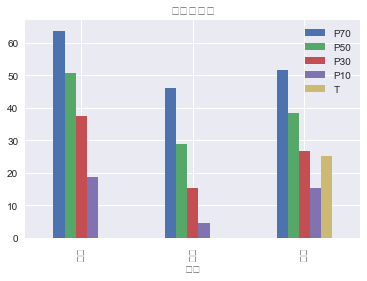

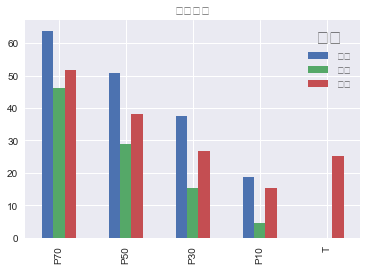

In [9]:
ansRatebyTypeGroup5 =  ansRatebyType.iloc[:,6:11]
ansRatebyTypeGroup5
ansRatebyTypeGroup5.plot.bar(title="不同得分群")
ansRatebyTypeGroup5.T.plot.bar(title="不同題型")

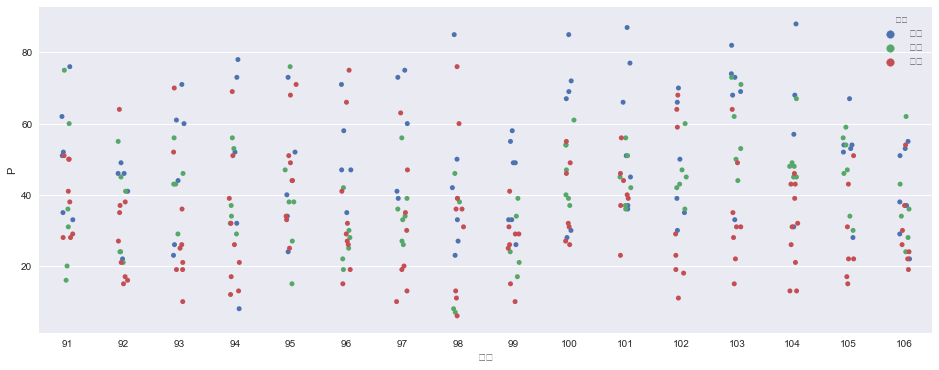

In [10]:
plt.figure(figsize=(16,6))
sns.stripplot(x="年份",y="P",data=exam,hue="題型",jitter=True)

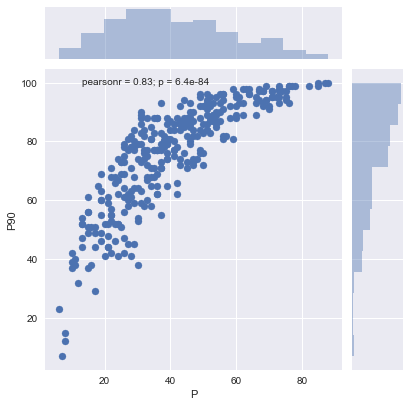

In [11]:
sns.jointplot(x="P",y="P90",data=exam)

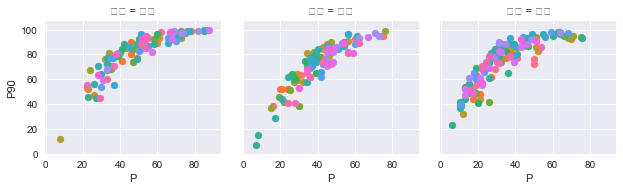

In [12]:
g = sns.FacetGrid(exam,col="題型",hue="年份")
g.map(plt.scatter,"P","P90")

將 單選, 多選, 填充 分成三個表 singCho, multCho, textBox

In [13]:
singCho = exam[exam["題型"].isin(['單選'])]
multCho = exam[exam["題型"] =='多選']
textBox = exam[exam.題型.isin(['填充'])]

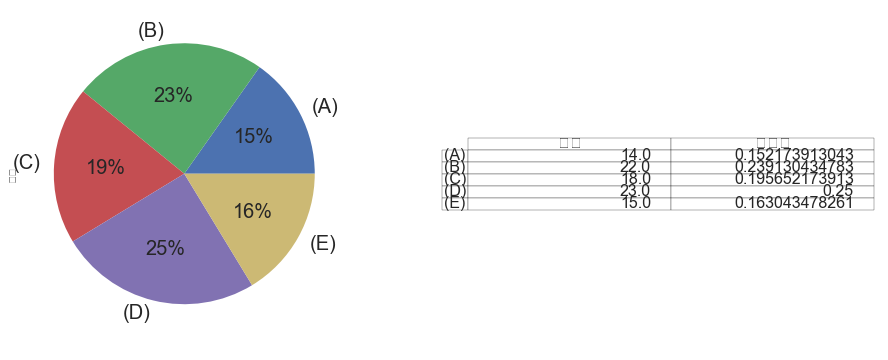

In [14]:
singChoAns = singCho[["答案","P"]].groupby(by = "答案").count()
singChoAns.columns.values[0]="題數"
singChoAns["百分比"]= singChoAns["題數"]/len(singCho)
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121,aspect="equal")
singChoAns.plot(kind='pie',y="題數",ax=ax1, autopct="%2d%%",fontsize = 20,legend=False)
ax2 = plt.subplot(122)
plt.axis("off")
from pandas.tools.plotting import table
tbl = table(ax2,singChoAns,loc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(16)
plt.show()

In [15]:
singCho.describe()

,年份,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
count,92.000000,92.000000,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,98.695652,50.532609,75.51087,50.804348,25.282609,81.695652,63.760870,50.815217,37.543478,18.695652,...,36.315217,38.130435,37.48913,44.565217,36.902174,32.673913,38.043478,42.934783,38.543478,33.489130
std,4.635598,18.316780,19.31036,24.504872,14.482522,16.912665,24.171716,24.851617,21.443723,10.854420,...,38.973062,38.767613,37.02197,38.016279,34.575943,19.745696,18.094327,17.022160,20.056192,18.936269
min,91.000000,8.000000,10.00000,7.000000,7.000000,12.000000,7.000000,7.000000,8.000000,5.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,3.000000,4.000000,6.000000,4.000000
25%,95.000000,35.000000,64.00000,27.000000,15.000000,73.500000,41.750000,28.000000,20.750000,10.750000,...,3.000000,3.000000,5.00000,4.750000,6.000000,13.750000,21.000000,28.750000,18.000000,12.750000
50%,99.000000,50.500000,81.00000,49.000000,20.000000,87.000000,68.500000,49.000000,30.500000,16.000000,...,11.500000,17.500000,18.00000,39.500000,25.500000,37.000000,41.000000,48.000000,43.000000,39.000000
75%,102.250000,67.000000,91.00000,72.250000,33.000000,95.000000,84.000000,73.250000,53.250000,25.000000,...,81.250000,80.500000,82.25000,84.250000,70.250000,49.250000,54.000000,56.000000,54.000000,49.250000
max,106.000000,88.000000,99.00000,98.000000,67.000000,100.000000,99.000000,98.000000,91.000000,52.000000,...,99.000000,98.000000,99.00000,99.000000,99.000000,78.000000,68.000000,74.000000,85.000000,66.000000


In [16]:
multChoAns = multCho[["答案","P"]].groupby(by = "答案").count()
multChoAns.columns.values[0]="題數"
multChoAns.sort_values("題數",ascending=False)

,題數
答案,
(B)(C)(D),7
(D)(E),7
(A)(B)(E),7
(A)(C)(E),6
(A)(B),5
(C)(D),5
(A)(B)(D),5
(A)(B)(D)(E),5
(B)(E),5


In [17]:
multChoAns.reset_index(inplace=True)
multChoAns["答案個數"]=multChoAns["答案"].apply(lambda x: round(len(x)/3),0)
multChoAnsNum = multChoAns.groupby("答案個數").sum()
multChoAnsNum["百分比"]=multChoAnsNum["題數"]/len(multCho)
multChoAnsNum

,題數,百分比
答案個數,,
1,3,0.031250
2,40,0.416667
3,39,0.406250
4,12,0.125000
5,2,0.020833


計算三種題型在不同群體的答對率

In [18]:
exambyChapter = exam.groupby("章節")
exambyChapter = exambyChapter.agg({"來源":"count","P":"mean","Ph":"mean","Pm":"mean","Pl":"mean","P90":"mean"})
exambyChapter.sort_values(by="來源",ascending=False)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msssj 三角函數,41,37.390244,66.975610,32.219512,12.975610,76.170732
msskx 空間向量,32,35.875000,64.718750,30.593750,12.312500,74.500000
msckx 數學綜合概念,31,54.000000,78.161290,56.387097,27.451613,83.419355
msspx 平面向量,31,38.290323,68.903226,33.612903,12.354839,78.129032
msajt 指數與對數,27,40.407407,68.481481,37.185185,15.555556,76.666667
msseq 二次曲線,27,34.111111,60.407407,29.592593,12.333333,69.407407
msadx 多項式,26,39.884615,66.346154,37.692308,15.615385,74.307692
msnsl 數列與遞迴,22,53.863636,77.772727,56.227273,27.590909,82.545455
mssjy 直線與圓,18,37.333333,67.166667,32.722222,12.111111,76.222222


In [19]:
exambyChapter.sort_values(by="P90",ascending=True)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msdsp 隨機變數,11,36.000000,57.727273,35.181818,15.090909,64.545455
msajz 矩陣與方程組,11,34.000000,58.909091,32.000000,11.090909,66.636364
msseq 二次曲線,27,34.111111,60.407407,29.592593,12.333333,69.407407
msdpc 排列組合與記數原理,15,41.200000,65.000000,40.133333,18.466667,71.733333
msadx 多項式,26,39.884615,66.346154,37.692308,15.615385,74.307692
msskx 空間向量,32,35.875000,64.718750,30.593750,12.312500,74.500000
msdtj 統計,13,46.384615,69.769231,47.230769,22.153846,75.461538
msdjl 機率,15,40.466667,67.800000,37.733333,15.866667,75.866667
msssj 三角函數,41,37.390244,66.975610,32.219512,12.975610,76.170732


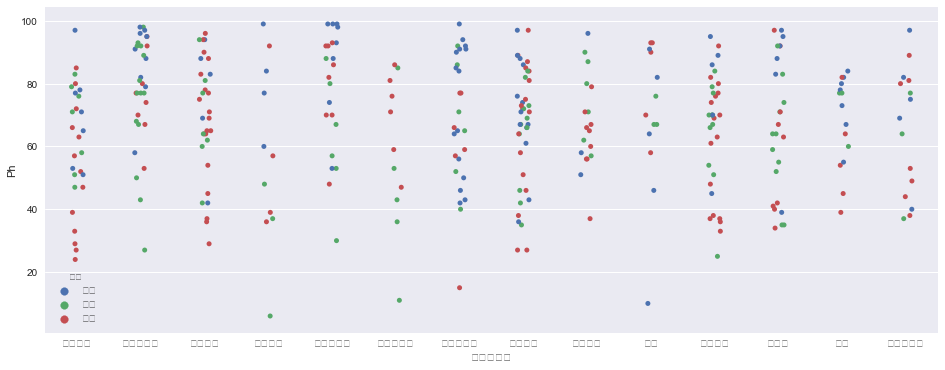

In [20]:
plt.figure(figsize=(16,6))
font = {'size':24}
matplotlib.rc('font',**font)
sns.stripplot(x="章節（短）",y="Ph",data=exam,hue="題型",jitter=True)

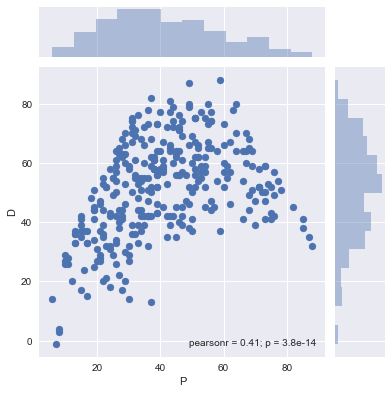

In [21]:
sns.jointplot(x="P",y="D",data=exam)

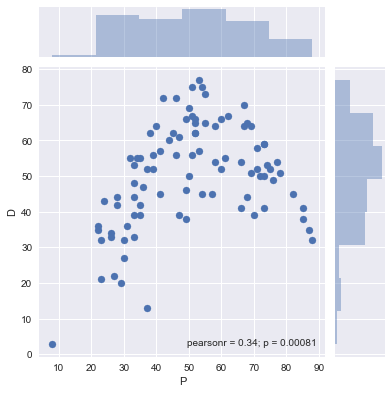

In [22]:
sns.jointplot(x="P",y="D",data=singCho)

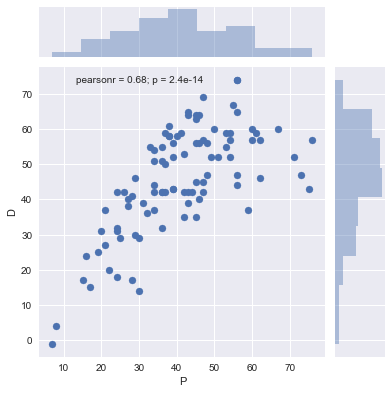

In [23]:
sns.jointplot(x="P",y="D",data=multCho)

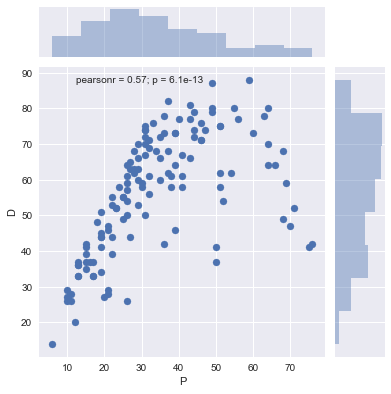

In [24]:
sns.jointplot(x="P",y="D",data=textBox)